In [1]:
from pyiron_workflow_lammps.engine import LammpsEngine
from pyiron_workflow_atomistics.dataclass_storage import CalcInputMinimize, CalcInputStatic
from pyiron_workflow.workflow import Workflow
from pyiron_workflow_atomistics.bulk import optimise_cubic_lattice_parameter
from pyiron_workflow_atomistics.gb.gb_study import pure_gb_study
from pyiron_workflow_atomistics.gb.dataclass_storage import CleaveGBStructureInput, PlotCleaveInput
from pyiron_workflow_atomistics.featurisers import distanceMatrixSiteFeaturiser, voronoiSiteFeaturiser
from pyiron_workflow_atomistics.gb.gb_code.searcher import get_gb_code_df, get_gb_code_df_with_structures

import os
import numpy as np
from ase.build import bulk

%load_ext autoreload
%autoreload 2

In [2]:
inp = CalcInputMinimize()
inp.relax_cell = False
Engine = LammpsEngine(EngineInput = inp)
Engine.working_directory = "pure_grain_boundary_study"
Engine.lammps_log_filepath = "minimize.log"
# Adjust this line to match your LAMMPS installation
# If you are using conda-lammps or a LAMMPS binary on your system, you can use directly:
Engine.command = "lmp -in in.lmp -log minimize.log"
Engine.input_script_pair_style = "eam/fs"
Engine.path_to_model = os.getcwd() + "/Al-Fe.eam.fs"


inp = CalcInputStatic()
Engine_static = LammpsEngine(EngineInput = inp)
Engine_static.working_directory = "pure_grain_boundary_study"
Engine_static.lammps_log_filepath = "static.log"
Engine_static.command = "lmp -in in.lmp -log static.log"
Engine_static.input_script_pair_style = "eam/fs"
Engine_static.path_to_model = os.getcwd() + "/Al-Fe.eam.fs"

# Use gb_code (integrated in the module) to find viable GBs

/root/miniconda3/envs/pyiron_pypi_workflow_lammps/lib/python3.12/site-packages/pyiron_workflow_lammps/engine.py:113: RuntimeWarning: 'mode' already set to 'minimize' and also implied by EngineInput; no change.
  warnings.warn(
2025-09-27 01:56:24,295 - pyiron_log - WARNING - Directory 'pure_grain_boundary_study/strain_000' already exists. Existing files may be overwritten.


current mode  minimize


2025-09-27 01:56:26,060 - pyiron_log - WARNING - Directory 'pure_grain_boundary_study/strain_001' already exists. Existing files may be overwritten.
2025-09-27 01:56:27,726 - pyiron_log - WARNING - Directory 'pure_grain_boundary_study/strain_002' already exists. Existing files may be overwritten.
2025-09-27 01:56:29,417 - pyiron_log - WARNING - Directory 'pure_grain_boundary_study/strain_003' already exists. Existing files may be overwritten.
2025-09-27 01:56:31,129 - pyiron_log - WARNING - Directory 'pure_grain_boundary_study/strain_004' already exists. Existing files may be overwritten.
2025-09-27 01:56:32,959 - pyiron_log - WARNING - Directory 'pure_grain_boundary_study/strain_005' already exists. Existing files may be overwritten.
Constructing GB structures: 100%|██████████| 24/24 [00:05<00:00,  4.10it/s]
2025-09-27 01:56:56,216 - pyiron_log - WARNING - Directory 'pure_grain_boundary_study/gb_length_optimiser/ext_0.800' already exists. Existing files may be overwritten.


current mode  static


2025-09-27 01:56:58,167 - pyiron_log - WARNING - Directory 'pure_grain_boundary_study/gb_length_optimiser/ext_0.300' already exists. Existing files may be overwritten.
2025-09-27 01:57:00,126 - pyiron_log - WARNING - Directory 'pure_grain_boundary_study/gb_length_optimiser/ext_-0.200' already exists. Existing files may be overwritten.
2025-09-27 01:57:02,320 - pyiron_log - WARNING - Directory 'pure_grain_boundary_study/gb_length_optimiser/ext_0.050' already exists. Existing files may be overwritten.
2025-09-27 01:57:04,056 - pyiron_log - WARNING - Directory 'pure_grain_boundary_study/gb_length_optimiser/ext_0.025' already exists. Existing files may be overwritten.
2025-09-27 01:57:05,766 - pyiron_log - WARNING - Directory 'pure_grain_boundary_study/gb_length_optimiser/ext_0.000' already exists. Existing files may be overwritten.
2025-09-27 01:57:07,555 - pyiron_log - WARNING - Directory 'pure_grain_boundary_study/gb_length_optimiser/ext_-0.025' already exists. Existing files may be ove

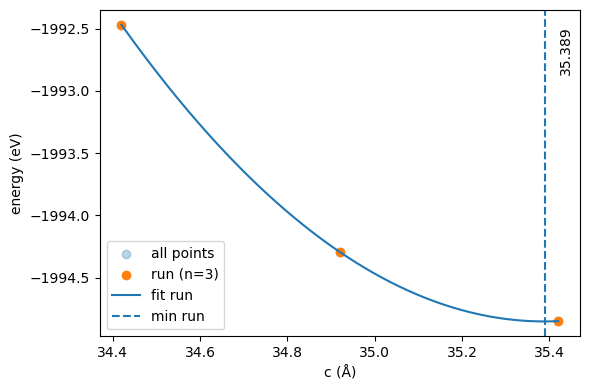

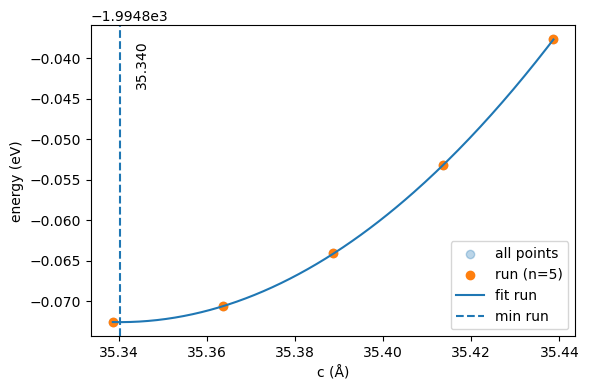

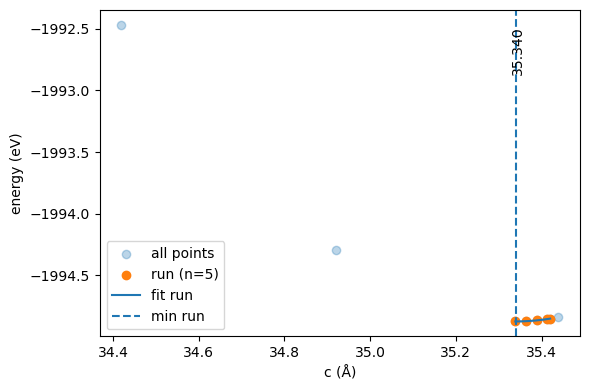

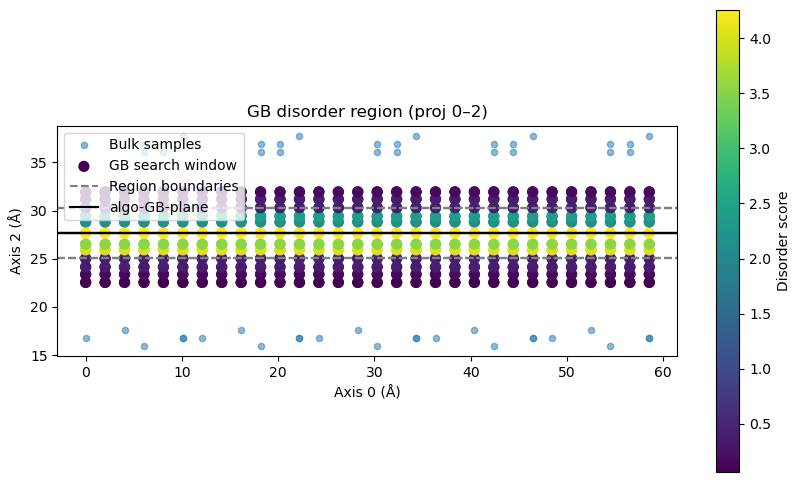

2025-09-27 01:57:28,650 - pyiron_log - WARNING - Directory 'pure_grain_boundary_study/gb_seg_supercell' already exists. Existing files may be overwritten.
2025-09-27 01:57:30,750 - pyiron_log - WARNING - Directory 'pure_grain_boundary_study/cleavage_study/cleavage_rigid/cleavage_rigid_cp_32.369' already exists. Existing files may be overwritten.
2025-09-27 01:57:32,431 - pyiron_log - WARNING - Directory 'pure_grain_boundary_study/cleavage_study/cleavage_rigid/cleavage_rigid_cp_31.568' already exists. Existing files may be overwritten.
2025-09-27 01:57:34,034 - pyiron_log - WARNING - Directory 'pure_grain_boundary_study/cleavage_study/cleavage_rigid/cleavage_rigid_cp_30.747' already exists. Existing files may be overwritten.
2025-09-27 01:57:35,650 - pyiron_log - WARNING - Directory 'pure_grain_boundary_study/cleavage_study/cleavage_rigid/cleavage_rigid_cp_29.859' already exists. Existing files may be overwritten.
2025-09-27 01:57:37,288 - pyiron_log - WARNING - Directory 'pure_grain_bo

{'opt_cubic_cell__equil_struct': Atoms(symbols='Fe2', pbc=True, cell=[2.8554036006730863, 2.8554036006730863, 2.8554036006730863], initial_magmoms=...),
 'opt_cubic_cell__B': np.float64(178.2689296133779),
 'opt_cubic_cell__volumes': [np.float64(21.287097162601995),
  np.float64(21.81268105404494),
  np.float64(22.346845717919777),
  np.float64(22.889660634165235),
  np.float64(23.441195282719992),
  np.float64(24.001519143522813)],
 'opt_cubic_cell__structures': [Atoms(symbols='Fe2', pbc=True, cell=[[2.77144, 1.6970175625144705e-16, 1.6970175625144705e-16], [0.0, 2.77144, 1.6970175625144705e-16], [0.0, 0.0, 2.77144]]),
  Atoms(symbols='Fe2', pbc=True, cell=[[2.794064, 1.7108707671064253e-16, 1.7108707671064253e-16], [0.0, 2.794064, 1.7108707671064253e-16], [0.0, 0.0, 2.794064]]),
  Atoms(symbols='Fe2', pbc=True, cell=[[2.816688, 1.72472397169838e-16, 1.72472397169838e-16], [0.0, 2.816688, 1.72472397169838e-16], [0.0, 0.0, 2.816688]]),
  Atoms(symbols='Fe2', pbc=True, cell=[[2.839312, 

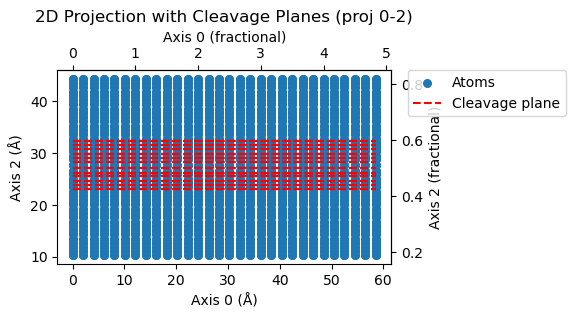

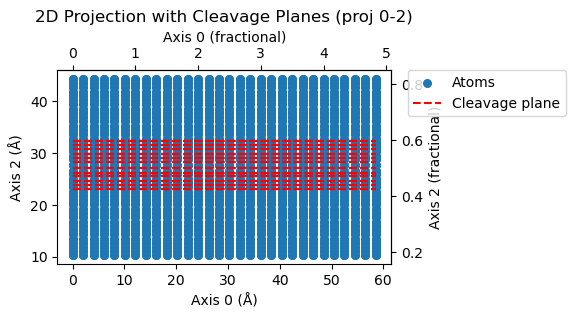

In [3]:
structure = bulk("Fe", a=2.828, cubic=True)

wf = Workflow(Engine.working_directory, delete_existing_savefiles=True)
wf.opt_cubic_cell = optimise_cubic_lattice_parameter(
    structure=structure,
    name="Fe",
    crystalstructure="bcc",
    calculation_engine=Engine,
    parent_working_directory="opt_cubic_cell",
    rattle=0.1,
    strain_range=(-0.02, 0.02),
    num_points=6,
)
# If you are doing a parameter study with different a0 and equil_volume_per_atom
# (e.g. different functionals/potentials, different basis sets, etc.), you can use 
# get_gb_code_df from the same import path as this node function
# from pyiron_workflow_atomistics.gb.gb_code.searcher import get_gb_code_df
# exc. the lattice_param, equil_volume_per_atom args
# This call can get quite expensive if you are searching over a wide range of parameters
# It is already parallelised over the axes_list, gb structure construction
wf.gb_code_df = get_gb_code_df_with_structures(
                                                axes_list=[np.array([1, 1, 1]), np.array([1, 1, 0]), np.array([1, 0, 0])],
                                                sigma_limit=10, # The maximum sigma value for the gb
                                                lim_plane_index=3, # The maximum search index of the plane to cleave the bulk structure
                                                max_atoms=100, # The maximum number of atoms in the "primordial" structure (smallest structure according to gb_code)
                                                max_workers=None, # The maximum number of workers for parallel processing None means use all available cores
                                                deduplicate=True, # gb_code generates duplicate structures, this removes them
                                                element="Fe", # The element of the bulk structure
                                                basis="bcc", # The basis of the bulk structure
                                                lattice_param=wf.opt_cubic_cell.outputs.a0, # The lattice parameter of the bulk structure
                                                equil_volume_per_atom=wf.opt_cubic_cell.outputs.equil_volume_per_atom, # The equilibrium volume per atom of the bulk structure
                                                min_inplane_gb_length=10, # The minimum length of the grain along the normal to the gb plane
                                                req_length_grain=15, # The required length of the grain along the normal to the gb plane
                                                grain_length_axis=0, # The axis along which the grain length is measured
                                            )
wf.pure_gb_study = pure_gb_study(
                    gb_structure = wf.gb_code_df.outputs.gb_code_df_with_structures.iloc[0].structure,
                    equil_bulk_volume = wf.opt_cubic_cell.outputs.equil_volume_per_atom,
                    equil_bulk_energy = wf.opt_cubic_cell.outputs.equil_energy_per_atom,
                    extensions_stage1 = np.linspace(-0.2, 0.8, 3),
                    extensions_stage2 = np.linspace(-0.05, 0.05, 5),
                    calculation_engine = Engine,
                    static_calculation_engine = Engine_static,
                    length_interpolate_min_n_points=5,
                    gb_normal_axis="c",
                    vacuum_length=20,
                    min_inplane_cell_lengths=[6, 6, None],
                    featuriser = voronoiSiteFeaturiser,
                    approx_frac = 0.5,
                    tolerance = 5.0,
                    bulk_offset = 10.0,
                    slab_thickness = 2.0,
                    featuriser_kwargs = None,
                    n_bulk = 10,
                    threshold_frac = 0.3,
                    CleaveGBStructure_Input=CleaveGBStructureInput(tol=0.3),
                    PlotCleave_Input=PlotCleaveInput())
wf.run()

To access the outputs of the (very large) pure_gb_study, you can access the outputs as a key-value dict mapping via:

In [4]:
# wf.pure_gb_study.outputs.to_value_dict()
for key in wf.pure_gb_study.outputs.to_value_dict().keys():
    print(key)
    # print(wf.pure_gb_study.outputs.to_value_dict()[key])
    # print("\n")

final_pure_grain_boundary_structure
final_pure_grain_boundary_structure_energy
grain_boundary_length_optimisation_df
grain_boundary_energy
grain_boundary_excess_volume
surface_energy
pure_grain_boundary_structure_vacuum
pure_grain_boundary_structure_vacuum_energy
gb_plane_analysis_dict
work_of_separation_rigid
work_of_separation_rigid_df
work_of_separation_relaxed
work_of_separation_relaxed_df


In [5]:
output_dict = wf.pure_gb_study.outputs.to_value_dict()
output_dict["final_pure_grain_boundary_structure_energy"]

np.float64(-1994.8725606401067)

So you can see that we have calculated:

    final_pure_grain_boundary_structure: the final structure of the pure grain boundary (vacuum terminated)

    final_pure_grain_boundary_structure_energy: the energy of the final structure of the pure grain boundary (vacuum terminated)

    grain_boundary_length_optimisation_df: a dataframe of the grain boundary length optimisation

    grain_boundary_energy: the grain boundary excess energy (also known as gb energy, J/m^2)
    
    grain_boundary_excess_volume: the excess volume of the grain boundary (compared to the bulk)

    surface_energy: the surface energy of the grain boundary (free surface energy of the gb plane J/m^2)

    pure_grain_boundary_structure_vacuum: the pure grain boundary structure (vacuum terminated)

    pure_grain_boundary_structure_vacuum_energy: the energy of the pure grain boundary structure (vacuum terminated)

    gb_plane_analysis_dict: a dictionary of the automated gb plane analysis 

    work_of_separation_rigid: the work of separation of the rigid grain boundary

    work_of_separation_rigid_df: a dataframe of the work of separation of the rigid grain boundary

    work_of_separation_relaxed: the work of separation of the relaxed grain boundary

    work_of_separation_relaxed_df: a dataframe of the work of separation of the relaxed grain boundary}

In [7]:
wf.gb_code_df.outputs.gb_code_df_with_structures.iloc[0].value

Axis                                                        [1, 1, 1]
Sigma                                                               3
m                                                                   3
n                                                                   1
GB1                                                      (-1, -1, -1)
GB2                                                      (-1, -1, -1)
Theta (deg)                                                      60.0
Type                                                            Twist
n_atoms                                                            12
canon                                    ((-1, -1, -1), (-1, -1, -1))
dupe                                                            False
structure           (Atom('Fe', [np.float64(0.0), np.float64(0.0),...
structure_natoms                                                  504
Name: 0, dtype: object

In [ ]:
# The calculated GB was
# np.float64(-1994.8725606401067)
# Axis                                                        [1, 1, 1]
# Sigma                                                               3
# m                                                                   3
# n                                                                   1
# GB1                                                      (-1, -1, -1)
# GB2                                                      (-1, -1, -1)
# Theta (deg)                                                      60.0
# Type                                                            Twist
# n_atoms                                                            12
# canon                                    ((-1, -1, -1), (-1, -1, -1))
# dupe                                                            False
# structure           (Atom('Fe', [np.float64(0.0), np.float64(0.0),...
gb_row = wf.gb_code_df.outputs.gb_code_df_with_structures.iloc[0].value
print(f"The calculated GB was: \
      \n Sigma: {gb_row.Sigma} \
      \n rotation axis: {gb_row.Axis} \
      \n plane normal: {gb_row.GB1} \
      \n rotation angle: {np.round(gb_row['Theta (deg)'], 3)} (deg)")
print(f"GB energy: {np.round(output_dict['grain_boundary_energy'], 3)} J/m^2")
print(f"excess volume: {np.round(output_dict['grain_boundary_excess_volume'], 3)} Å^3/Å^2")
print(f"surface energy: {np.round(output_dict['surface_energy'], 3)} J/m^2")
print(f"work of separation (rigid): {np.round(output_dict['work_of_separation_rigid'], 3)} J/m^2")
print(f"work of separation (relaxed): {np.round(output_dict['work_of_separation_relaxed'], 3)} J/m^2")
from IPython.display import display, HTML

gb_energy = np.round(output_dict['grain_boundary_energy'], 3)
wsep_relaxed = np.round(output_dict['work_of_separation_relaxed'], 3)
display(HTML(
    f'<div style="color:orange; font-weight:bold;">⚠️ <br>'
    f'Clearly, the potential is not suitable for this use case, as surface energies and gb energies are almost the same! <br>'
    f'The GB energy is not accurate for this potential, it is too low ({gb_energy}), DFT predicts 1.60 J/m².<br>'
    f'The work of separation is not accurate for this potential, it is too low ({wsep_relaxed}), DFT predicts 3.862 J/m².<br>'
    'See <a href="http://crystalium.materialsvirtuallab.org/" target="_blank">crystalium.materialsvirtuallab.org</a></div>'
))

The calculated GB was:       
 Sigma: 3       
 rotation axis: [1, 1, 1]       
 plane normal: (np.int64(-1), np.int64(-1), np.int64(-1))       
 rotation angle: 60.0 (deg)
GB energy: 1.308 J/m^2
excess volume: 0.36 Å^3/Å^2
surface energy: 1.311 J/m^2
work of separation (rigid): 2.897 J/m^2
work of separation (relaxed): 2.621 J/m^2


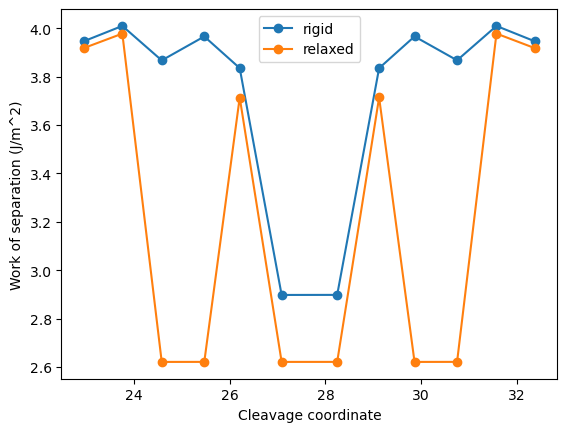

In [32]:
# We can also look at the work of separation as a function of the cleavage coordinate
wsep_rigid_df = output_dict['work_of_separation_rigid_df']
wsep_relaxed_df = output_dict['work_of_separation_relaxed_df']
from matplotlib import pyplot as plt
plt.plot(wsep_rigid_df['cleavage_coord'], wsep_rigid_df['cleavage_energy'], marker='o', label='rigid')
plt.plot(wsep_relaxed_df['cleavage_coord'], wsep_relaxed_df['cleavage_energy'], marker='o', label='relaxed')
plt.xlabel('Cleavage coordinate')
plt.ylabel('Work of separation (J/m^2)')
plt.legend()
plt.show()
